# Model Selection and Goodness of Fit
## Part 2 of 2




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of [Lecture 4.](https://github.com/alam740/Data-Analytics-Course/blob/master/Lecture-PDFs/ECE%20595%20-%20Lecture%2004.pdf)

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import weibull_min,norm,lognorm

Normal Guassian Random Variable

Mean:  5.0
Variance:  0.0625




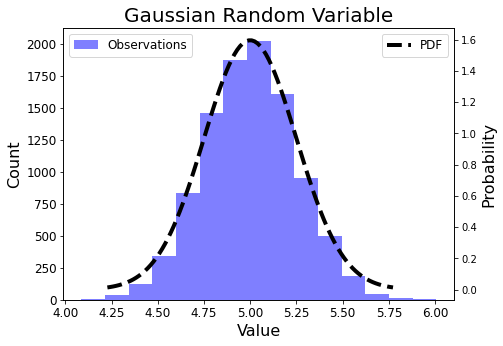

In [ ]:
#@title Underlying distribution

## For the underlying distribution we will create data 
## from a guassian distribution paramatrized by mu and sigma

mu = 5
sig = 0.25

rv = norm(loc=mu,scale=sig)
mean, var, skew, kurt = rv.stats(moments='mvsk')

## Display the statistics of the distribution

print("Normal Guassian Random Variable\n")
print("Mean: ",mean)
print("Variance: ",var)
print("\n")

y = rv.rvs(10000,random_state=1)

x = np.linspace(rv.ppf(0.001),
                rv.ppf(0.999), 100)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches((7,5))

ax.hist(y,bins=15,color='b',alpha = 0.5)

ax.set_ylabel("Count",fontsize =16)
ax.set_xlabel("Value",fontsize =16)
ax.legend(["Observations"],loc='upper left',fontsize =12)
ax.tick_params(axis = 'both', labelsize = 12)

ax2 = ax.twinx()
ax2.plot(x, rv.pdf(x),
            'k--', lw=4)
ax2.set_ylabel("Probability",fontsize =16)
ax2.legend(["PDF"],fontsize =12)
ax2.set_title("Gaussian Random Variable",fontsize =20)
plt.show()

#We can use then scipy's statistics module to fit distributions to a set of data

### Note: all of scipy's fitting modules use MLE by defult

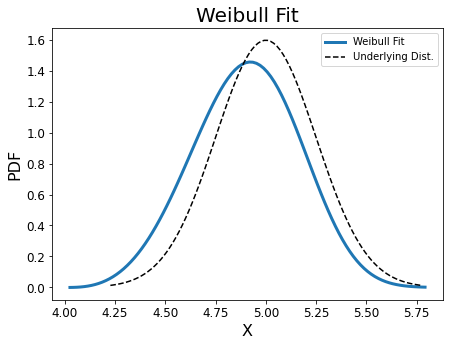

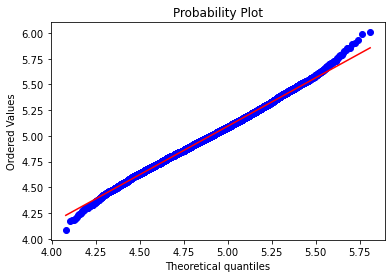



KS test statistics for Weibull Normal fit: 1.00
Pvalue:  0.0


In [ ]:
# fit the data using a weibull distribution

## Define some fitting parameters to get a better fit
## You can change these to see how it changes the fit
## These seemed optimal in my testing, and chaging may
## result in a worse fit 

muW = 4 # psudeo mu
sigW = 1 # psuedo sigma

c,locW,scaleW = weibull_min.fit(y,floc = muW,fscale = sigW) # fit

rvW = weibull_min(c,locW,scaleW) # return a frozen random variable

xW = np.linspace(rvW.ppf(0.000001),
                rvW.ppf(0.9999), 100) # obtain the pdf
# plot the pdf

fig, ax = plt.subplots()
ax.plot(xW,rvW.pdf(xW),linewidth = 3)

ax.plot(x,rv.pdf(x),'k--')
fig.set_size_inches((7,5))
ax.set_xlabel("X",fontsize = 16)
ax.set_ylabel("PDF",fontsize = 16)
ax.set_title("Weibull Fit",fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(["Weibull Fit","Underlying Dist."])

plt.show()

print("\n")

plt.figure(2)
res2 = stats.probplot(y,dist = weibull_min, 
                      sparams = (c,locW,scaleW), plot = plt)

plt.show()

print('\n')
##Then we can use a kstest to test to help determine the goodness of fit


ktest = stats.kstest(y, stats.weibull_max(c,locW,scaleW).cdf, alternative='less',N=10)

print("KS test statistics for Weibull Normal fit: %.2f"%(ktest[0]))
print("Pvalue: ",(ktest[1]))

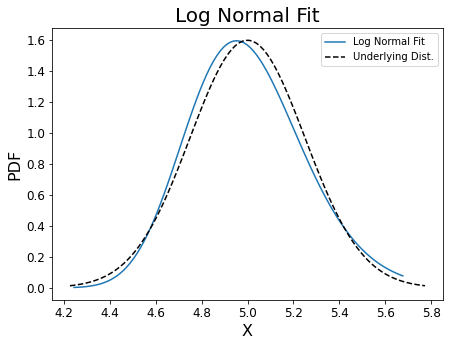

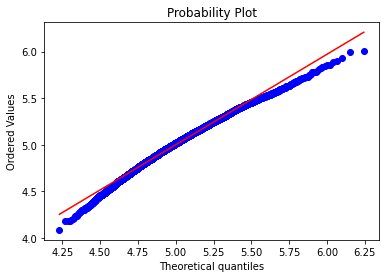




KS test statistics for Log Normal fit: 0.16
Pvalue:  6.315966984509524e-236


In [ ]:
## now use a lognormal distribution

mu = 3.1

s,locN,scaleN = lognorm.fit(y,floc=mu)
rvN = lognorm(s,locN,scaleN)

xN = np.linspace(rvN.ppf(0.0001),
                rvN.ppf(0.99), 100)

fig,ax = plt.subplots()

fig.set_size_inches((7,5))

ax.plot(xN,rvN.pdf(xN))

ax.plot(x,rv.pdf(x),'k--')
fig.set_size_inches((7,5))
ax.set_xlabel("X",fontsize = 16)
ax.set_ylabel("PDF",fontsize = 16)
ax.set_title("Log Normal Fit",fontsize = 20)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(["Log Normal Fit","Underlying Dist."])

plt.show()

print('\n')
## plot Q-Q plots of the different distributions using 
## scipys built in module

plt.figure(2)
res1 = stats.probplot(y,dist = lognorm, 
                      sparams = (s,locN,scaleN), plot = plt)
plt.show()

print('\n\n')
ktest = stats.kstest(y, stats.norm(loc=5,scale=0.5).cdf, alternative='less', N=10)

print("KS test statistics for Log Normal fit: %.2f"%(ktest[0]))
print("Pvalue: ",(ktest[1]))


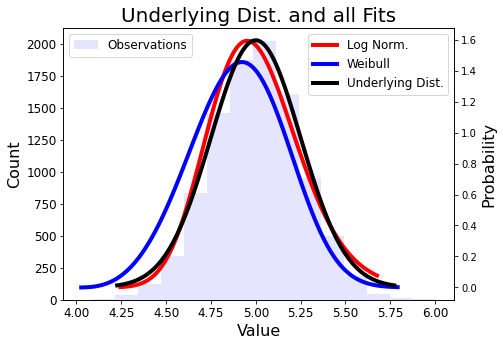

In [ ]:
# we can also plot all the PDFs against the underlying distribution 
## and histogram to get the full picture



fig, ax = plt.subplots(1, 1)
fig.set_size_inches((7,5))

ax.set_title("Underlying Dist. and all Fits",fontsize=20)
ax.hist(y,bins=15,color='b',alpha = 0.1)

ax.set_ylabel("Count",fontsize =16)
ax.set_xlabel("Value",fontsize =16)
ax.legend(["Observations"],loc='upper left',fontsize =12)
ax.tick_params(axis = 'both', labelsize = 12)

ax2 = ax.twinx()

ax2.set_ylabel("Probability",fontsize =16)


ax2.plot(xN,rvN.pdf(xN),'r',linewidth = 4)
ax2.plot(xW,rvW.pdf(xW),'b',linewidth = 4)
ax2.plot(x, rv.pdf(x),'k',lw=4)

ax2.legend(["Log Norm.","Weibull","Underlying Dist."],fontsize =12)


plt.show()
